<a href="https://colab.research.google.com/github/kimjoe1850/Lectures/blob/main/Machine_Learning/4.%20%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83(K_Nearest_Neighbor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [105]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [7]:
iris = load_iris()

In [9]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [25]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [26]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 1.0


In [28]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [30]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.31666666666666665
평가 데이터 점수 : 0.4


In [32]:
# 교차 검증을 통한 최적 파라미터
cross_validate(
    estimator = KNeighborsClassifier(),
    X = X, y=y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.8s finished


{'fit_time': array([0.00129604, 0.00135303, 0.00100636, 0.00092387, 0.00083232]),
 'score_time': array([0.0028944 , 0.00296521, 0.00269222, 0.00249553, 0.00224018]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [33]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights' : ['uniform','distance'],
               'algorithm' : ['ball_tree','kd_tree','brute']}]

In [34]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [35]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [36]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [37]:
print("GridSearchCV best score : {}".format(gs.best_score_))

GridSearchCV best score : 0.9800000000000001


In [58]:
def make_meshgrid(x,y,h=0.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
  
  return xx,yy

def plot_contours(clf, xx,yy,**params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy,Z, **params)

  return out

In [ ]:
# 차원 축소(t-sne) - 비선형 방법의 차원 축소, 고차원의 데이터셋을 시각화하는 데 좋음
tsne = TSNE(n_components = 2) # 줄이고 싶은 차원의 개수
X_comp = tsne.fit_transform(X)

In [51]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df ['Target'] = y
iris_comp_df

,0,1,Target
0,16.913628,16.226904,0
1,14.241552,17.122385,0
2,14.468307,15.946702,0
3,13.988530,16.305092,0
4,16.919342,15.803080,0
...,...,...,...
145,-14.266685,-2.982077,2
146,-11.306125,-4.521824,2
147,-13.490064,-3.596539,2
148,-15.242747,-4.544459,2


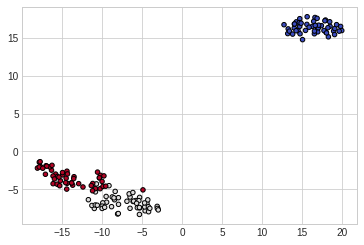

In [52]:
plt.scatter(X_comp[:,0], X_comp[:,1],
            c=y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [53]:
model= KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

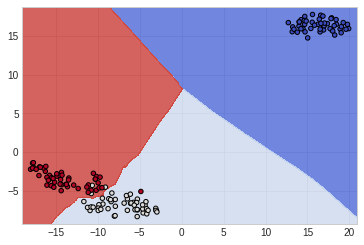

In [59]:
xx, yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model, xx,yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s=20, edgecolors = 'k')

### 유방암 데이터

In [113]:
cancer = load_breast_cancer()

In [114]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [115]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [116]:
# train data 확인
cancer_train_df = pd.DataFrame(data = X_train, columns = cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.04,28.14,76.85,449.9,0.08752,0.06000,0.023670,0.023770,0.1854,0.05698,...,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639,1
1,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.218800,0.112100,0.1848,0.06222,...,30.76,163.20,1760.0,0.1464,0.35970,0.51790,0.21130,0.2480,0.08999,0
2,12.65,18.17,82.69,485.6,0.10760,0.13340,0.080170,0.050740,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.38420,0.35820,0.14070,0.3230,0.10330,1
3,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.244800,0.150100,0.1824,0.06140,...,25.80,195.00,2227.0,0.1294,0.38850,0.47560,0.24320,0.2741,0.08574,0
4,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,...,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,0.05961,...,28.14,170.10,2145.0,0.1624,0.35110,0.38790,0.20910,0.3537,0.08294,0
451,14.60,23.29,93.97,664.7,0.08682,0.06636,0.083900,0.052710,0.1627,0.05416,...,31.71,102.20,758.2,0.1312,0.15810,0.26750,0.13590,0.2477,0.06836,0
452,13.08,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.1312,0.27760,0.18900,0.07283,0.3184,0.08183,1
453,17.01,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,0.2026,0.05223,...,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469,0


In [117]:
# test data 확인
cancer_test_df = pd.DataFrame(data = X_test, columns = cancer.feature_names)
cancer_test_df['target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.460,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,0.05966,...,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496,0
1,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,0.06612,...,21.40,86.67,552.0,0.15800,0.17510,0.18890,0.08411,0.3155,0.07538,1
2,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
3,12.340,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,0.05708,...,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974,1
4,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,...,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,11.740,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,0.06758,...,17.60,81.25,473.8,0.10730,0.27930,0.26900,0.10560,0.2604,0.09879,1
110,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,25.84,139.50,1239.0,0.13810,0.34200,0.35080,0.19390,0.2928,0.07867,0
111,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022,1
112,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1


In [118]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [119]:
# 원래 데이터 모델 학습
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [120]:
# 결과
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.945054945054945
평가 데이터 점수 : 0.9385964912280702


In [121]:
# X train_data 표준화 데이터 모델 학습
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [122]:
# 결과
print("훈련 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

훈련 데이터 점수 : 0.9802197802197802
평가 데이터 점수 : 0.9824561403508771


In [75]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [76]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv = 5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished


{'fit_time': array([0.00372529, 0.00450253, 0.00234723, 0.0044663 , 0.01457453]),
 'score_time': array([0.0104568 , 0.01322269, 0.00822353, 0.03264976, 0.01341629]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [77]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [78]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree','kd_tree', 'brute']}]

In [87]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [ ]:
gs.fit(X, y)

In [92]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [93]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9701288619779538


In [ ]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

In [100]:
cancer_comp_df = pd.DataFrame(data = X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,-38.883572,-9.027171,0
1,-40.943420,-7.321085,0
2,-38.603931,-3.072079,0
3,18.515327,-7.873520,0
4,-36.323864,-2.814398,0
...,...,...,...
564,-42.385899,-8.144181,0
565,-38.640133,-4.107725,0
566,-26.779167,10.402947,0
567,-39.387421,-5.782276,0


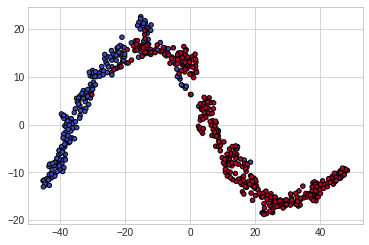

In [101]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s=20, edgecolors = 'k');

In [103]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)

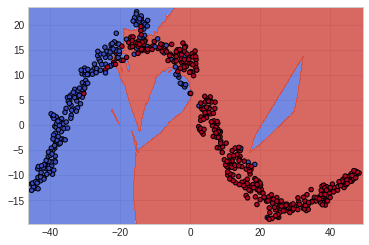

In [104]:
# 시간이 많이 걸림 - 개수만큼 각각 어느 위치에 해당하는지 predict 하는데 계산이 들어가므로
xx,yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx,yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s=20, edgecolors = 'k')

### 와인 데이터

In [141]:
wine = load_wine()

In [142]:
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [143]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [144]:
# train data 확인
wine_train_df = pd.DataFrame(data = X_train, columns = wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
1,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1
2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
3,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0
4,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0,2
138,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0,1
139,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
140,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1


In [145]:
# test data 확인
wine_test_df = pd.DataFrame(data = X_test, columns = wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2
1,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1
2,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0,1
3,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
4,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0,0
5,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0,2
6,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,2
7,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
8,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
9,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1


In [146]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [147]:
# 원래 데이터 모델 학습
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [148]:
# 결과
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.7816901408450704
평가 데이터 점수 : 0.6388888888888888


In [149]:
# X train_data 표준화 데이터 모델 학습
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [150]:
# 결과
print("훈련 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

훈련 데이터 점수 : 0.9859154929577465
평가 데이터 점수 : 0.9444444444444444


In [151]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [152]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv = 5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00237179, 0.0023315 , 0.00575376, 0.00217223, 0.00199294]),
 'score_time': array([0.00345469, 0.00914359, 0.0054059 , 0.00392294, 0.0025816 ]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [153]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [154]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree','kd_tree', 'brute']}]

In [155]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [156]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [157]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [158]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9665079365079364


In [159]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [160]:
wine_comp_df = pd.DataFrame(data = X_comp)
wine_comp_df['target'] = y
wine_comp_df

,0,1,target
0,5.259705,-10.605638,0
1,4.982689,-10.346478,0
2,6.197183,-12.648991,0
3,7.536623,-15.179758,0
4,-0.174095,-3.706286,0
...,...,...,...
173,-0.549142,-3.947064,2
174,-0.249968,-4.281508,2
175,1.401198,-6.361834,2
176,1.708162,-6.341052,2


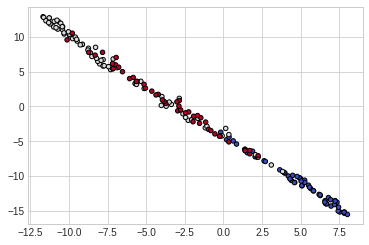

In [161]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s=20, edgecolors = 'k');

In [162]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)

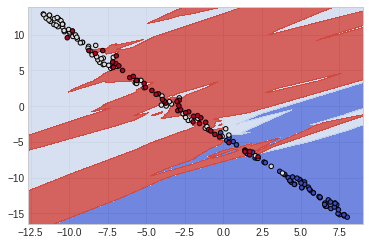

In [163]:
# 시간이 많이 걸림 - 개수만큼 각각 어느 위치에 해당하는지 predict 하는데 계산이 들어가므로
xx,yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx,yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s=20, edgecolors = 'k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [ ]:
boston = load_boston()

In [176]:
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['Target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [177]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [178]:
# train data 확인
boston_train_df = pd.DataFrame(data = X_train, columns = boston.feature_names)
boston_train_df['target'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.34006,0.0,21.89,0.0,0.624,6.458,98.9,2.1185,4.0,437.0,21.2,395.04,12.60,19.2
1,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
2,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
4,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
400,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
401,0.12269,0.0,6.91,0.0,0.448,6.069,40.0,5.7209,3.0,233.0,17.9,389.39,9.55,21.2
402,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0


In [168]:
# test data 확인
boston_test_df = pd.DataFrame(data = X_test, columns = boston.feature_names)
boston_test_df['target'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21,19.3
1,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29,19.9
2,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
3,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
98,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
99,11.81230,0.0,18.10,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74,8.4
100,0.19802,0.0,10.59,0.0,0.489,6.182,42.4,3.9454,4.0,277.0,18.6,393.63,9.47,25.0


In [179]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [180]:
# X train_data 데이터 모델 학습
model = KNeighborsRegressor() # 회귀
model.fit(X_train, y_train)

KNeighborsRegressor()

In [181]:
# 결과
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.7083443675047687
평가 데이터 점수 : 0.4530611741476386


In [183]:
# X train_data 표준화 데이터 모델 학습
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [184]:
# 결과
print("훈련 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

훈련 데이터 점수 : 0.848045322415898
평가 데이터 점수 : 0.8175465716061765


In [185]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [186]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv = 5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00355768, 0.00538659, 0.00278592, 0.00419259, 0.00228333]),
 'score_time': array([0.00330329, 0.0034368 , 0.00268841, 0.00257921, 0.00213099]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [187]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [188]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree','kd_tree', 'brute']}]

In [189]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [190]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [191]:
gs.best_estimator_ # regressor의 weight는 distance

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [192]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.4973060611762845


In [ ]:
tsne = TSNE(n_components = 1) # regressor는 1로 해야됨 classifier는 2
X_comp = tsne.fit_transform(X)

In [202]:
boston_comp_df = pd.DataFrame(data = X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,-17.107058,24.0
1,-37.002441,21.6
2,-33.330647,34.7
3,-34.366966,33.4
4,-34.598660,36.2
...,...,...
501,-20.004744,22.4
502,-20.630272,20.6
503,-21.410597,23.9
504,-21.366003,22.0


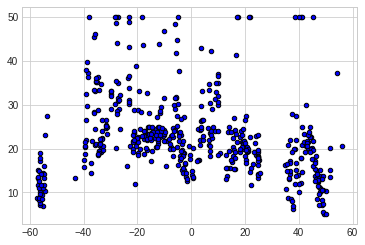

In [203]:
plt.scatter(X_comp, y, c = 'b', cmap = plt.cm.coolwarm, s=20, edgecolors = 'k');

In [205]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

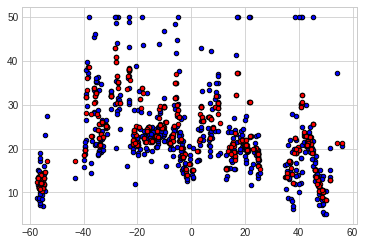

In [207]:
plt.scatter(X_comp, y, c='b', cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')
plt.scatter(X_comp, predict, c='r', cmap = plt.cm.coolwarm, s=20, edgecolors = 'k')

### 캘리포니아 주택 가격 데이터

In [208]:
california = fetch_california_housing()

In [209]:
california_df = pd.DataFrame(data = california.data, columns = california.feature_names)
california_df['Target'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [210]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [211]:
# train data 확인
california_train_df = pd.DataFrame(data = X_train, columns = california.feature_names)
california_train_df['target'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.7015,18.0,7.519824,0.955947,1272.0,2.801762,33.78,-118.05,3.909
1,4.7625,13.0,5.265207,1.002433,1087.0,2.644769,37.41,-121.95,1.375
2,4.1447,11.0,5.630952,0.988095,1701.0,3.375000,38.55,-121.34,1.140
3,2.7463,18.0,5.122016,1.007958,1271.0,3.371353,38.95,-121.08,1.561
4,0.8702,11.0,3.717262,0.931548,625.0,1.860119,34.02,-118.33,1.705
...,...,...,...,...,...,...,...,...,...
16507,4.3750,38.0,4.897727,1.011364,484.0,2.750000,33.99,-118.06,1.862
16508,2.3087,52.0,4.038760,1.065891,1438.0,2.786822,37.74,-122.42,2.586
16509,1.9063,52.0,1.553030,0.901515,228.0,1.727273,37.97,-122.53,2.000
16510,3.2813,37.0,4.784946,1.025090,539.0,1.931900,34.15,-118.44,3.017


In [212]:
# test data 확인
california_test_df = pd.DataFrame(data = X_test, columns = california.feature_names)
california_test_df['target'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,4.4886,34.0,5.945578,1.000000,800.0,2.721088,32.81,-117.14,1.791
1,2.2467,46.0,5.940678,1.104520,1339.0,3.782486,37.74,-122.18,0.889
2,2.5234,35.0,6.239130,1.072464,381.0,2.760870,34.13,-117.25,0.882
3,2.5122,45.0,4.750000,1.061983,1437.0,2.969008,37.76,-122.16,0.955
4,3.0827,29.0,4.791506,1.019305,2773.0,2.676641,36.70,-121.65,1.481
...,...,...,...,...,...,...,...,...,...
4123,2.8393,15.0,5.427403,1.083845,1267.0,2.591002,37.31,-119.64,1.044
4124,5.5362,30.0,5.498667,1.056000,1089.0,2.904000,34.22,-118.25,3.012
4125,2.3155,14.0,4.290146,1.131387,1215.0,2.217153,39.76,-121.84,1.023
4126,5.4622,17.0,6.417910,1.077612,1194.0,3.564179,33.60,-117.69,2.270


In [213]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [214]:
# X train_data 데이터 모델 학습
model = KNeighborsRegressor() # 회귀
model.fit(X_train, y_train)

KNeighborsRegressor()

In [215]:
# 결과
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.45569814388974095
평가 데이터 점수 : 0.1468597252480056


In [216]:
# X train_data 표준화 데이터 모델 학습
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [217]:
# 결과
print("훈련 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

훈련 데이터 점수 : 0.7925123813590516
평가 데이터 점수 : 0.6866298544890602


In [218]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [219]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv = 5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.5s finished


{'fit_time': array([0.05350041, 0.03848672, 0.03497005, 0.0337851 , 0.03744245]),
 'score_time': array([0.54626179, 0.47742224, 0.52133512, 0.61087346, 0.3465693 ]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [220]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [221]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree','kd_tree', 'brute']}]

In [222]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [223]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [224]:
gs.best_estimator_ # regressor의 weight는 distance

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [225]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.5376515274379832


In [226]:
tsne = TSNE(n_components = 1) # regressor는 1로 해야됨 classifier는 2
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [227]:
boston_comp_df = pd.DataFrame(data = X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,3.524399,4.526
1,-65.386368,3.585
2,-11.423170,3.521
3,-15.919295,3.413
4,-16.394537,3.422
...,...,...
20635,50.098602,0.781
20636,-4.157445,0.771
20637,85.218689,0.923
20638,-39.349167,0.847


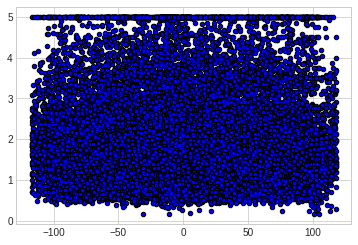

In [228]:
plt.scatter(X_comp, y, c = 'b', cmap = plt.cm.coolwarm, s=20, edgecolors = 'k');

In [229]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

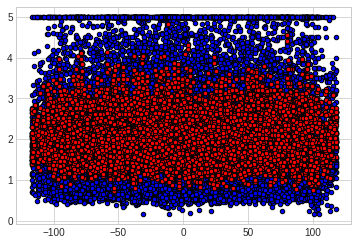

In [230]:
plt.scatter(X_comp, y, c='b', cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')
plt.scatter(X_comp, predict, c='r', cmap = plt.cm.coolwarm, s=20, edgecolors = 'k')